In [1]:
%matplotlib inline
import json
import os.path
import nltk
from nltk.tag import pos_tag
import pprint
import pandas as pd
import time

In [2]:
def tweettotable(input_tweets,input_table): #program does nothing as written
    x=[]
    with open(input_tweets) as f1:
        for line in f1:
            x.append(json.loads(line))
    if not os.path.isfile(input_table):
        f2 = open(input_table, 'w')
        for t in range(len(x)):
            f2.write('\t'.join([x[t]['created_at'].encode("utf8"), x[t]['text'].encode("utf8").replace('\n',''),'\n']))    
    else:
        print 'the table file ',input_table,' already exists'

In [3]:
tweettotable('data/tweets.json','data/input_table.csv')

the table file  data/input_table.csv  already exists


In [4]:
input_table='data/input_table.csv'

In [28]:
df=pd.read_csv(input_table,sep='\t',header=None, names=['time','text','non'])
df.drop('non',axis=1,inplace=True)

In [29]:
ts = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(df['time'][1],'%a %b %d %H:%M:%S +0000 %Y'))

In [30]:
df['datetime']=df.time.apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', 
                                                     time.strptime(x,'%a %b %d %H:%M:%S +0000 %Y')))

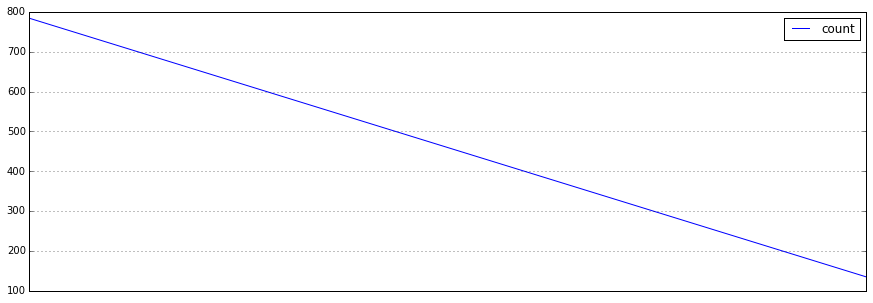

In [31]:
df.set_index(pd.DatetimeIndex(df.datetime),inplace=True)
df['count']=1
df.resample('H',sum).plot(figsize=(15,5))

In [32]:
stops=['http','RT','@']
for stop in stops:
    df.text=df.text.str.replace(stop,'')
df['text']=df.text.str.lower()    
df['text_utf8']=df.text.apply(lambda x: x.decode('utf-8'))
l=df.text_utf8.tolist()
text=' . '.join(l)

In [33]:
token_text= nltk.word_tokenize(text)
tagged_sent = nltk.pos_tag(token_text)

In [34]:
nouns= []
for word, pos in tagged_sent:
    if pos in ['NN',"NNP"]:
        nouns.append(word)
freq=nltk.FreqDist(nouns)

In [48]:
top=sorted(freq,key=freq.get,reverse=True)[:10]

In [49]:
for key in top:    
    df[key]= df.text_utf8.apply(lambda x: key in x)

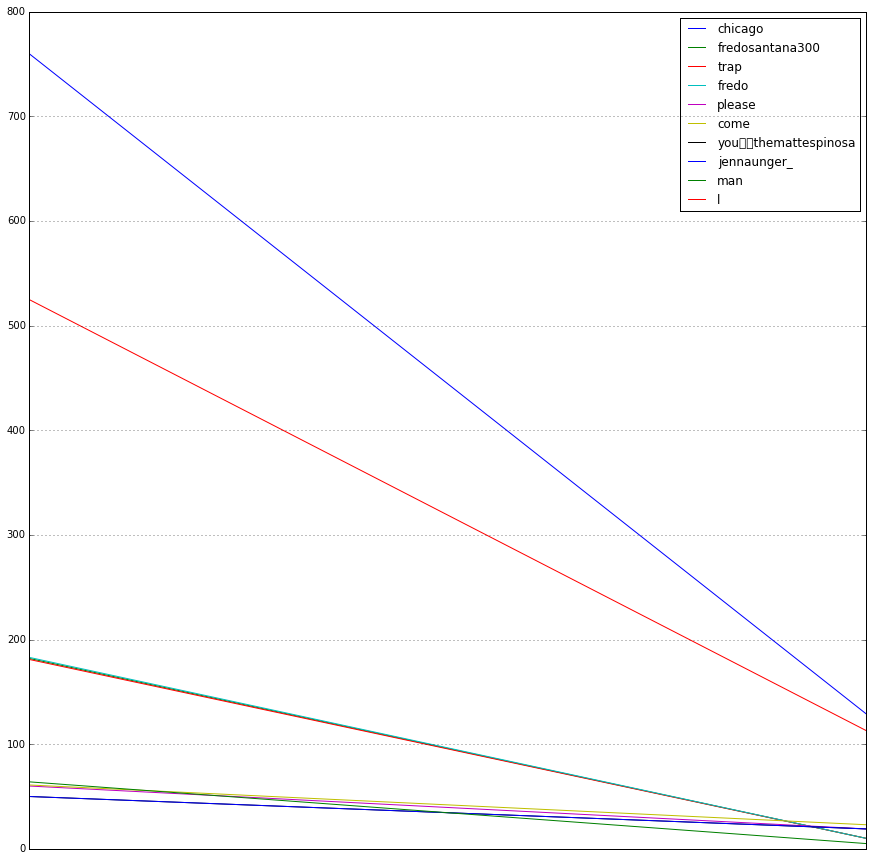

In [50]:
df[top].resample('H',sum).plot(figsize=(15,15))